In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Tools import Plot
%matplotlib widget

np.random.seed(4)

In [2]:
N = 100000
x = -1 + 2*np.random.rand(N)   # Points between -1 and 1

## Creating tanh function training data

In [4]:
k = 50   # steepness parameter
x1 = -1/3  # location of transition parameter
x2 = 1/3

y = 1/2*(1 + np.tanh(k*(x-x1))) - 1/2*(1 + np.tanh(k*(x-x2)))

file = open('Data/tanh_1D.txt', 'w+')

for i in range(N-1):
    file.write(f'{x[i]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1]:.14} {y[N-1]:.14}')
file.close()

## Creating sharp circle function in 2D

In [4]:
x = -1 + 2*np.random.rand(N, 2)
center = [0, 0] # center of the circle
r = 1/2           # radius of the circle
k = 50            # steepness

y = 1/2*(1 + np.tanh(-k*(np.sqrt((x[:,0]-center[0])**2 + (x[:,1]-center[1])**2) - r)))
    
file = open('Data/tanh_2D.txt', 'w+')

for i in range(N-1):
    file.write(f'{x[i,0]:.14} {x[i,1]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1,0]:.14} {x[N-1,1]:.14} {y[N-1]:.14}')
file.close()

## Looking at the 2D function

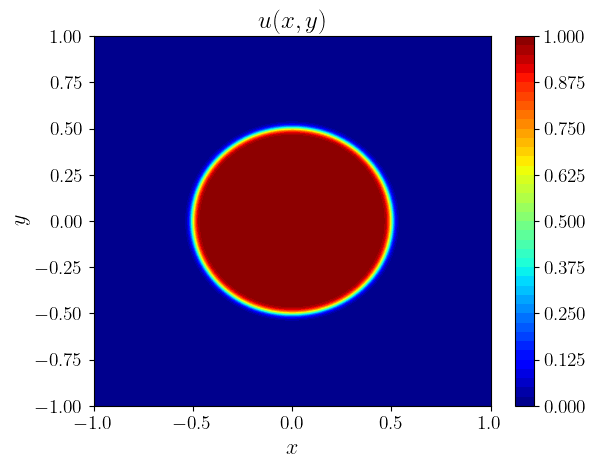

In [11]:
x = np.linspace(-1,1,500)
X,Y = np.meshgrid(x,x)
center = [0, 0] # center of the circle
r = 1/2          # radius of the circle
k = 50           # steepness
Z = 1/2*(1 + np.tanh(-k*(np.sqrt((X-center[0])**2 + (Y-center[1])**2) - r)))

plt.figure()
plt.contourf(X, Y, Z, levels=40, cmap='jet')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$u(x,y)$')
#plt.savefig('Figures_V2/2D/function2D.pdf', bbox_inches='tight')
plt.show()

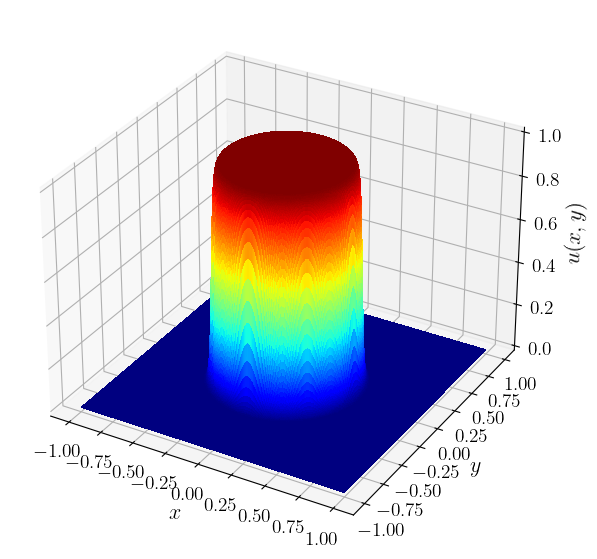

In [12]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='jet', rstride=1, cstride=1, antialiased=False)
ax.set(xlabel='$x$')
ax.set(ylabel='$y$')
ax.set(zlabel='$u(x,y)$')
#plt.colorbar(surf, pad=0.15, shrink=0.6)
#plt.savefig('Figures/2D/objective_3D.pdf', bbox_inches='tight')
plt.show()

## Creating the function from equation 49 in the paper

In [ ]:
dim = 2

x = np.random.rand(N,dim)
y = np.zeros(N)
E = 4

norm = lambda x: np.linalg.norm(x, 2, axis=1)
a = lambda x: np.tanh(E*np.sin(5*np.pi/2*x))
b = lambda x: np.tanh(E*np.sin(5*np.pi/2*x))

y = a(a(norm(x))) + a(b(norm(x-1)))

file = open('Data/function_paper.txt', 'w+')

for i in range(N-1):
    file.write(f'{x[i,0]:.14} {x[i,1]:.14} {y[i]:.14} \n')
    
file.write(f'{x[N-1,0]:.14} {x[N-1,1]:.14} {y[N-1]:.14}')
file.close()

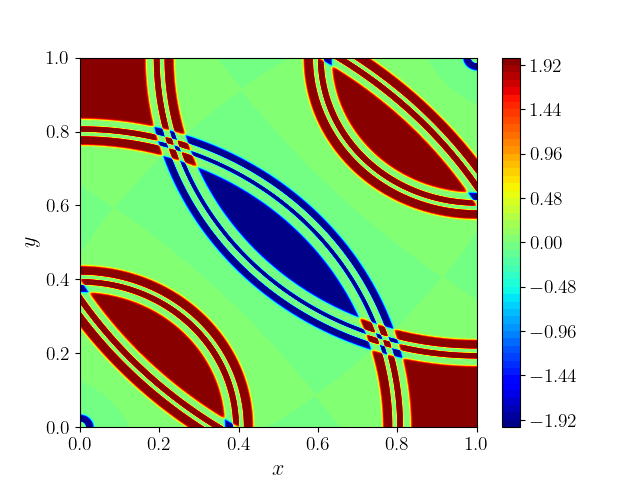

In [32]:
x = np.linspace(0,1,1000)
X,Y = np.meshgrid(x,x)
E = 4

norm = lambda X,Y: np.sqrt(X**2 + Y**2)
a = lambda X: np.tanh(E*np.sin(5*np.pi/2*X))
b = lambda X: np.tanh(E*np.sin(5*np.pi/2*X))

Z = a(a(norm(X,Y))) + a(b(norm(X-1, Y-1)))

plt.figure()
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## Tanh in 10 dimensions

In [21]:
x = -1 + 2*np.random.rand(N,10)
center = np.zeros(10) # center of the circle
r = np.sqrt(10)/2     # radius of the circle (we set it to the center of the interval for r)
k = 50            # steepness

y = 1/2*(1 + np.tanh(-k*(np.linalg.norm(x-center, ord=2, axis=1) - r)))
    
file = open('Data/tanh_10D.txt', 'w+')

for i in range(N-1):
    for j in range(10):
        file.write(f'{x[i,j]:.14} ')
    file.write(f'{y[i]:.14} \n')

for j in range(10):
    file.write(f'{x[N-1,j]:.14} ')
file.write(f'{y[N-1]:.14}')
file.close()

In [38]:
N = 100000
x = -1 + 2*np.random.rand(N, 10)
center = np.zeros(10) # center of the circle
r = 0             # radius of the circle (we set it to the center of the interval for r)
k = 50            # steepness

y = 1/2*(1 + np.tanh(-k*(np.sum(x-center, axis=1)/10 - r)))
    
file = open('Data/tanh_10D_sum.txt', 'w+')

for i in range(N-1):
    for j in range(10):
        file.write(f'{x[i,j]:.14} ')
    file.write(f'{y[i]:.14} \n')

for j in range(10):
    file.write(f'{x[N-1,j]:.14} ')
file.write(f'{y[N-1]:.14}')
file.close()